In [1]:
from matrixprofile import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

The basic idea behind the matrix profile method is that, given a time series $T = \{t_1,\dots,t_n\}$, we fix a certain length $m$ and take all the subsequences of $T$ of length $m$, i.e, we take all subsets of the form $\{t_i,t_{i+1},\dots,t_{i+m-1}\}$ for $0\leq i  \leq n-m+1$. Let's call these subsequences $A[i]$ and the set of all subsequences $Sub$. The matrix profile of the time series returns an array which has, in position $i$, the subsequence in $Sub$ (other than $A[i]$) that minimizes the distance to $A[i]$. 

Note: It also returns a second array with the subsequences that minimize these distances, that is, if the first array is the $min$ over a certain set, this second one is $argmin$ over the same set.

The intuition behind it is that if a certain subsequence repeats itself somewhere in the series forming a pattern, then the matrix profile for that subsequence will be small, whereas if it's fairly unique the matrix profile will be big.

For a quick example, we consider a function plotted in the $(0,100)$ interval which is the cosine in the intervals $(0,50)$ and $(55,100)$ and the sine in $(50,55)$. The matrix profile should be able to capture the anomaly in the $(50,55)$ period and give a low value for the rest.

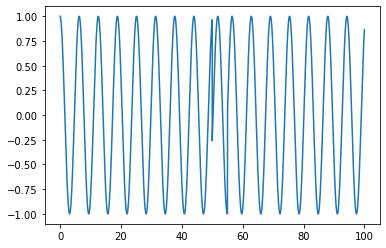

In [2]:
x = np.linspace(0,100,20000)
y = np.empty(20000)
y[0:10000] = np.cos(x[0:10000])
y[10000:11000] = np.sin(x[10000:11000])
#y[10000:11000] = np.random.uniform(-1,2,1000)
y[11000:20000] = np.cos(x[11000:20000])
plt.plot(x,y);

We compute and plot the matrix profile for $m=1000$ and $m=2000$.

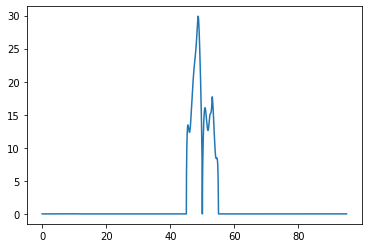

In [23]:
m = 1000
z = x[:-(m-1)]
plt.plot(z,matrixProfile.stomp(y,m)[0]);

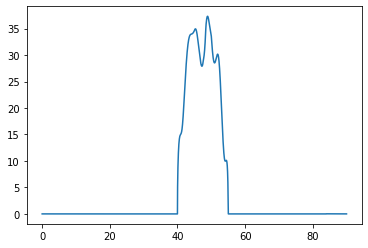

In [24]:
m = 2000
z = x[:-(m-1)]
plt.plot(z,matrixProfile.stomp(y,m)[0]);

Notice how in both cases the method was able to identify the anomaly, but in the case of $m=1000$ it had a dip back to $0$ right in the middle of it. The reason for this is that $1000$ is the exact length of this anomaly, so when the subsequences are mostly taking values in it they are pretty close to each other and thus give a low value. When switching to $m=2000$ the dip doesn't happen because the subsequences going through the anomaly all have values outside of it as well.